In [1]:
import copy
import numpy as np
import os

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.patheffects as path_effects
import matplotlib.gridspec as gridspec
import matplotlib.transforms as transforms

In [3]:
import analysis_config

In [4]:
import linefinder.analyze_data.worldlines as a_worldlines
import linefinder.analyze_data.worldline_set as a_w_set
import linefinder.analyze_data.plot_worldlines as p_worldlines

/home1/03057/zhafen/.local/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
import linefinder.utils.presentation_constants as p_constants
import linefinder.utils.file_management as file_management
import linefinder.config as linefinder_config

In [6]:
import galaxy_dive.plot_data.plotting as plotting
import galaxy_dive.analyze_data.particle_data as particle_data
import galaxy_dive.utils.astro as astro_utils
import galaxy_dive.utils.utilities as utilities
import galaxy_dive.utils.executable_helpers as exec_helpers
import galaxy_dive.utils.data_operations as data_operations
import galaxy_dive.plot_data.qual_colormaps as qual_colormaps

# Load Data

In [7]:
snum, galdef = exec_helpers.choose_config_or_commandline(
    [ analysis_config.SNUM, analysis_config.GALDEF ]
)
print( 'Using snum {}, galdef {}'.format( snum, galdef ) )

Using snum 465, galdef _galdefv3


In [8]:
tag_tail = '_CGM_snum{}'.format( snum )

In [9]:
ahf_index = 600

In [10]:
ind = ahf_index - snum

In [11]:
# Load the a helper for loading files easily
file_manager = file_management.FileManager( project='CGM_origin' )

In [12]:
defaults, variations = file_manager.get_linefinder_analysis_defaults_and_variations(
    tag_tail, 
    sim_names = analysis_config.SIM_NAMES,
    galdef = galdef,
)

In [13]:
w_set = a_w_set.WorldlineSet( defaults, variations )

# Analyze Data

## Setup

In [14]:
classification_list = copy.copy( p_constants.CLASSIFICATIONS_CGM_ORIGIN )
classification_list.remove( 'is_CGM_satellite' )
classification_list.insert( 0, 'is_in_CGM' )

In [15]:
w_set.data_object.retrieve_halo_data()
halo_masses = w_set.data_object.m_vir.inner_item( snum )

In [16]:
z_min = halo_masses.array().min()/1.5
z_max = halo_masses.array().max()*1.5

## Get Total Angular Momentum
Also, make a plot of rotated coords as a check

File saved at /work/03057/zhafen/extra_plots/CGM_origin/edge_on_star_plots/rx_ry_m12b_md_snum465.png


/opt/apps/intel17/python/2.7.13/lib/python2.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log10


File saved at /work/03057/zhafen/extra_plots/CGM_origin/edge_on_star_plots/rx_ry_m10q_snum465.png
File saved at /work/03057/zhafen/extra_plots/CGM_origin/edge_on_star_plots/rx_ry_m10v_snum465.png
File saved at /work/03057/zhafen/extra_plots/CGM_origin/edge_on_star_plots/rx_ry_m11e_md_snum465.png
File saved at /work/03057/zhafen/extra_plots/CGM_origin/edge_on_star_plots/rx_ry_m10z_snum465.png
File saved at /work/03057/zhafen/extra_plots/CGM_origin/edge_on_star_plots/rx_ry_m12z_md_snum465.png
File saved at /work/03057/zhafen/extra_plots/CGM_origin/edge_on_star_plots/rx_ry_m11v_snum465.png
File saved at /work/03057/zhafen/extra_plots/CGM_origin/edge_on_star_plots/rx_ry_m11q_snum465.png
File saved at /work/03057/zhafen/extra_plots/CGM_origin/edge_on_star_plots/rx_ry_m10y_snum465.png
File saved at /work/03057/zhafen/extra_plots/CGM_origin/edge_on_star_plots/rx_ry_m12r_md_snum465.png
File saved at /work/03057/zhafen/extra_plots/CGM_origin/edge_on_star_plots/rx_ry_m12f_snum465.png
File saved 

/opt/apps/intel17/python/2.7.13/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


File saved at /work/03057/zhafen/extra_plots/CGM_origin/edge_on_star_plots/rx_ry_m11b_snum465.png


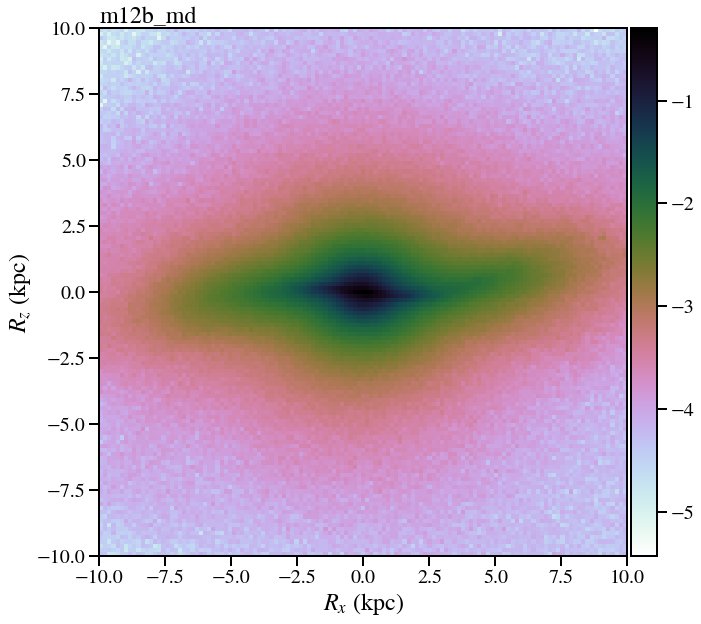

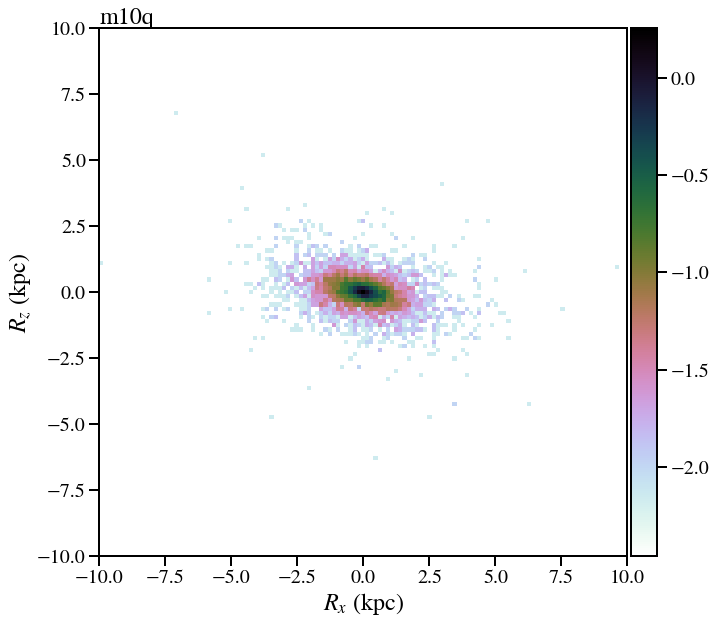

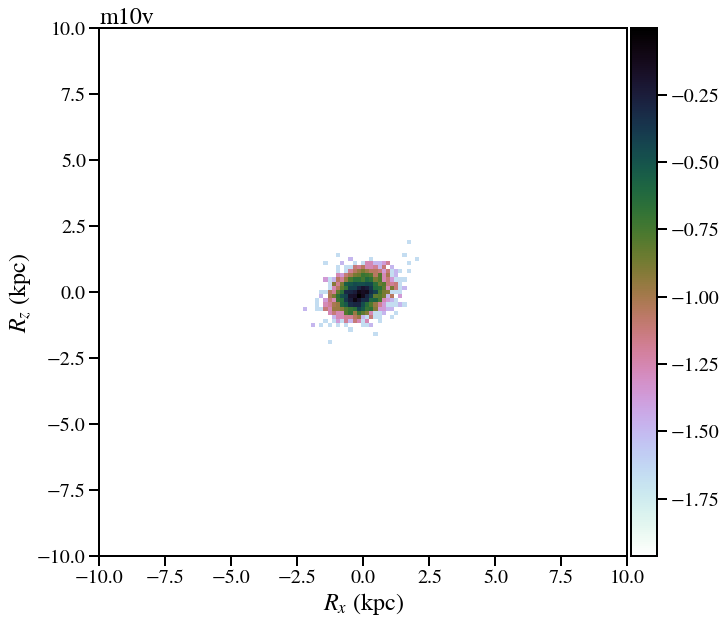

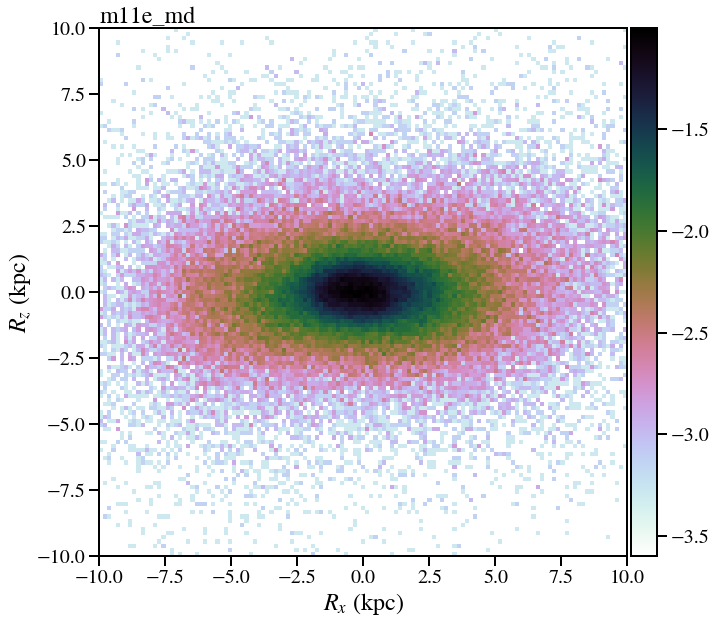

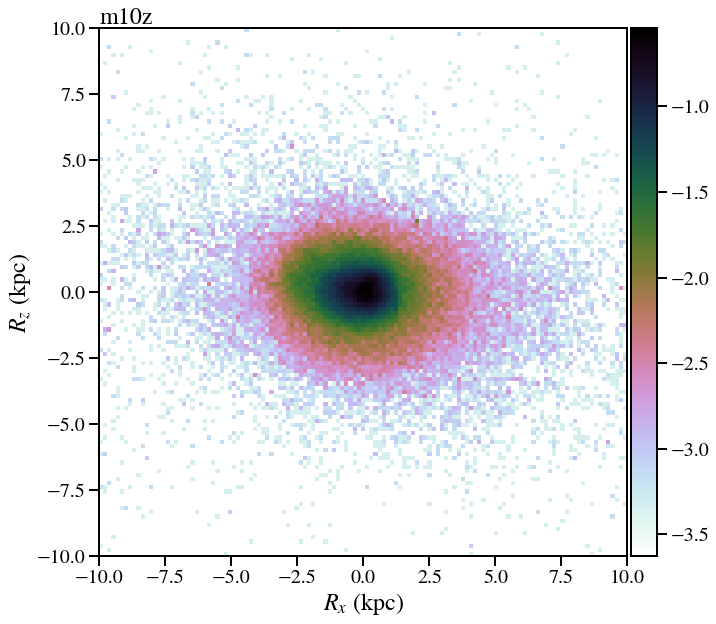

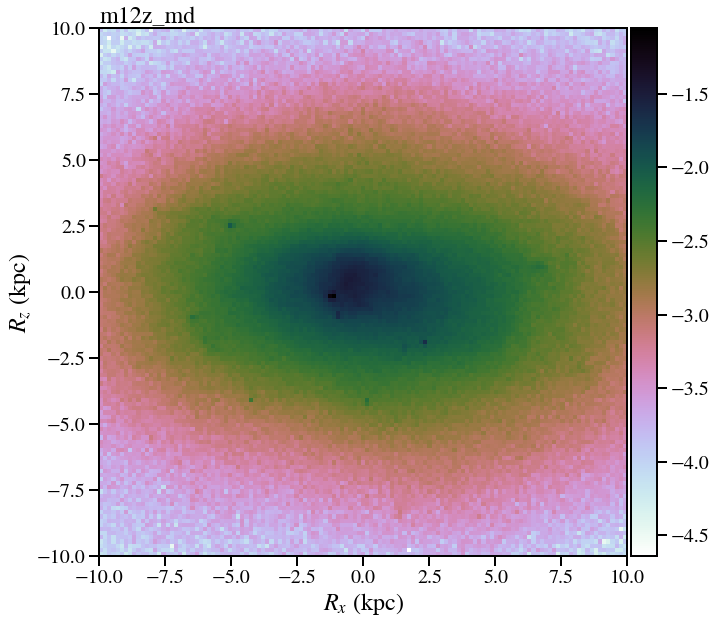

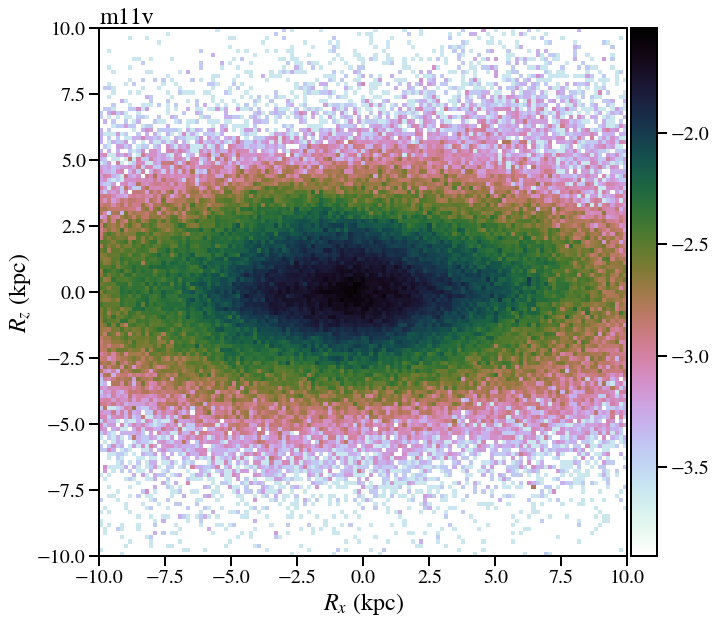

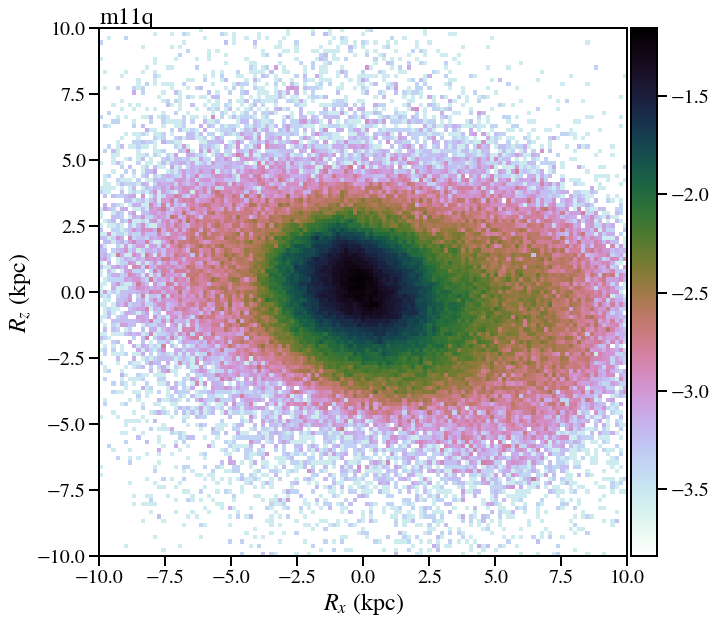

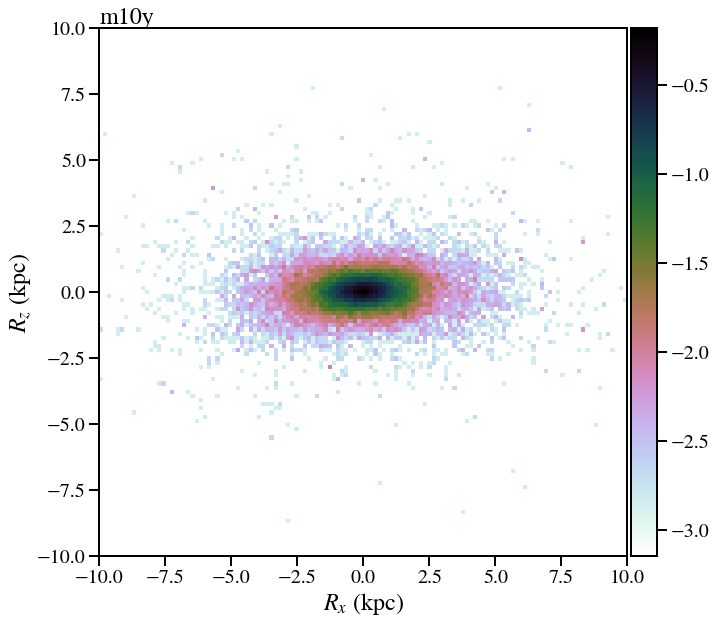

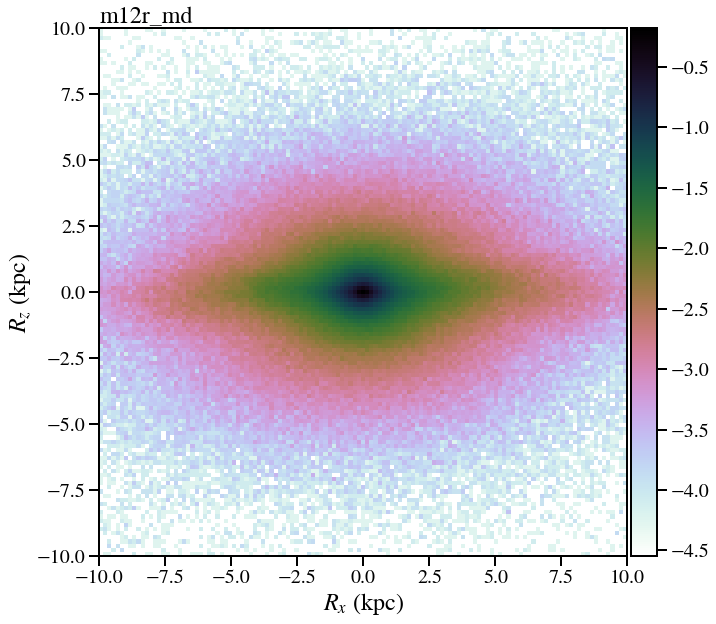

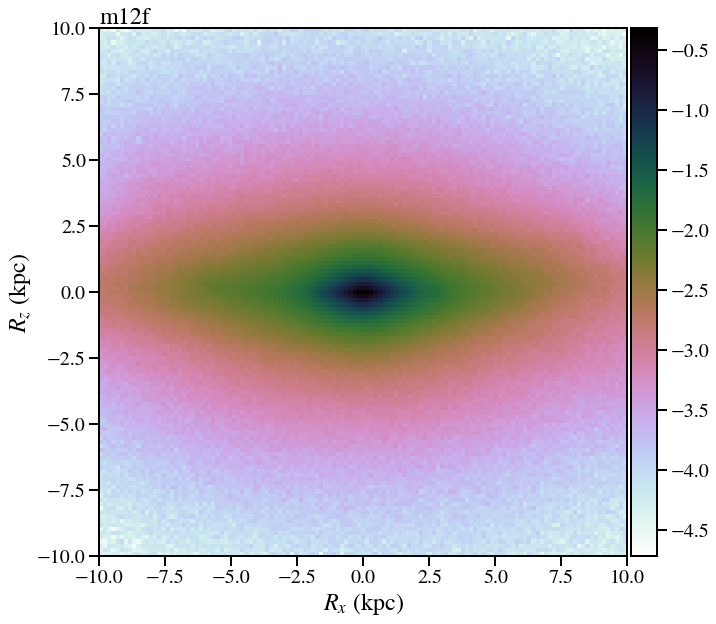

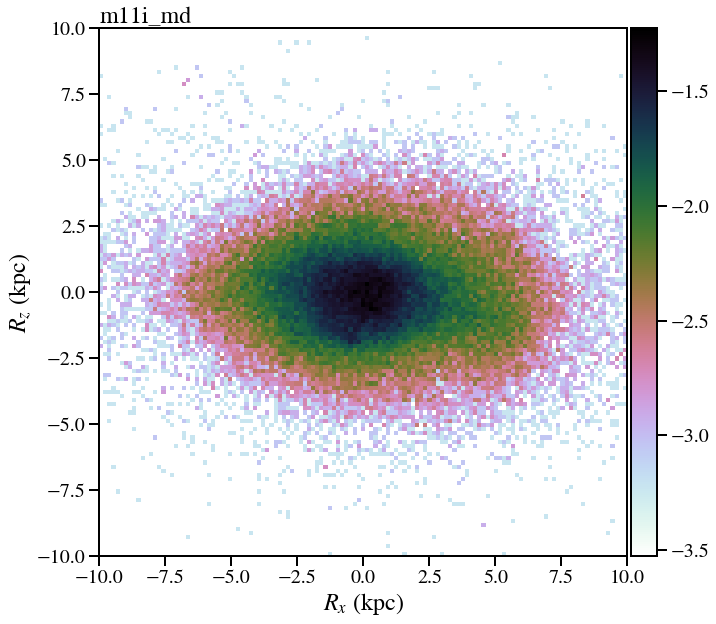

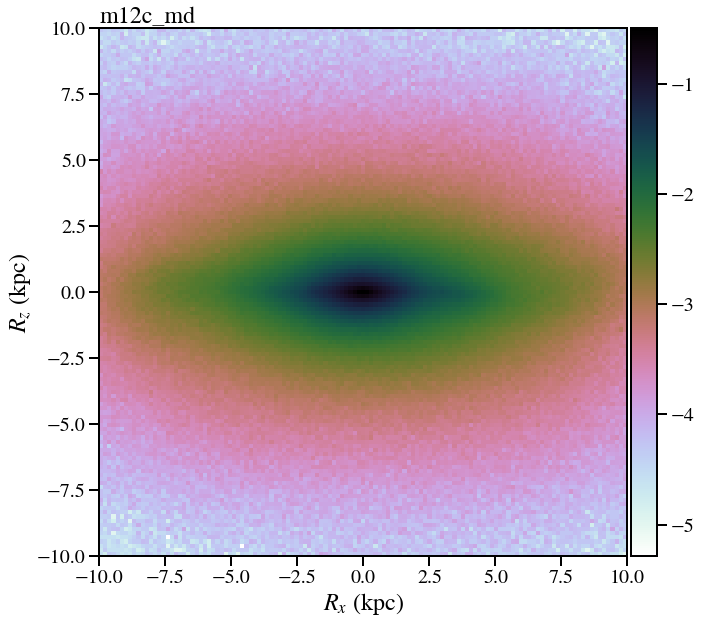

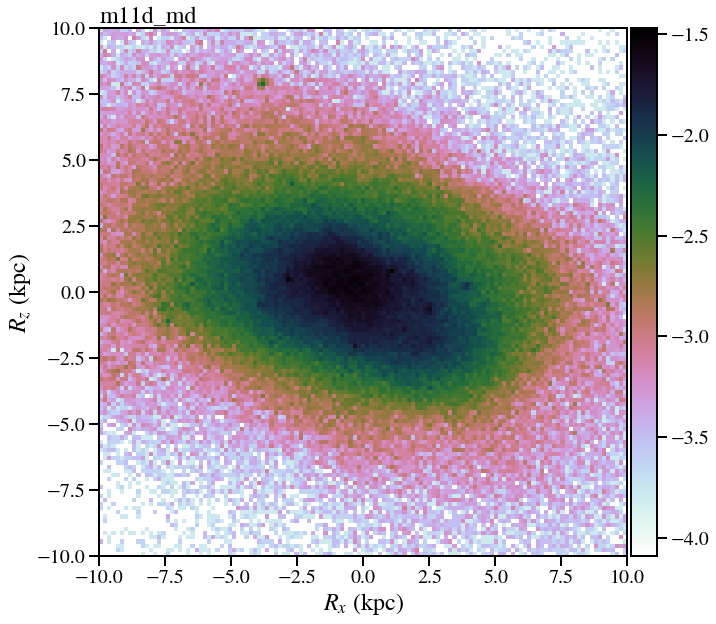

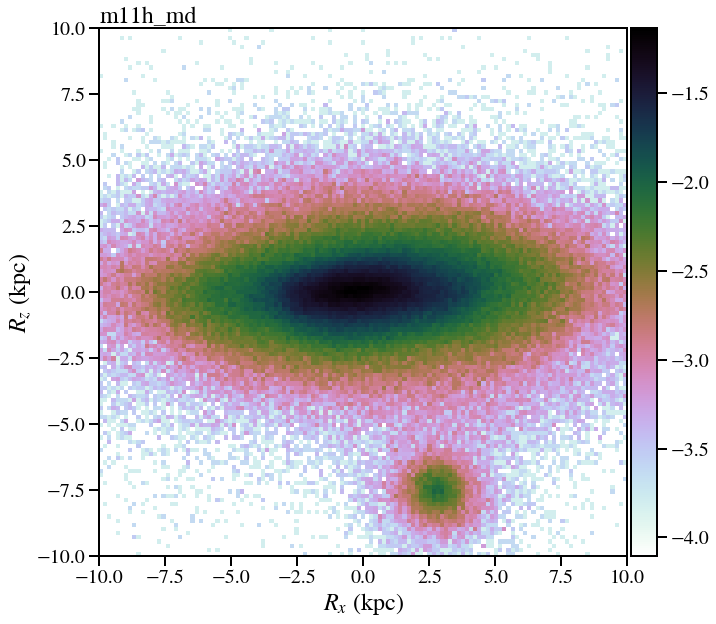

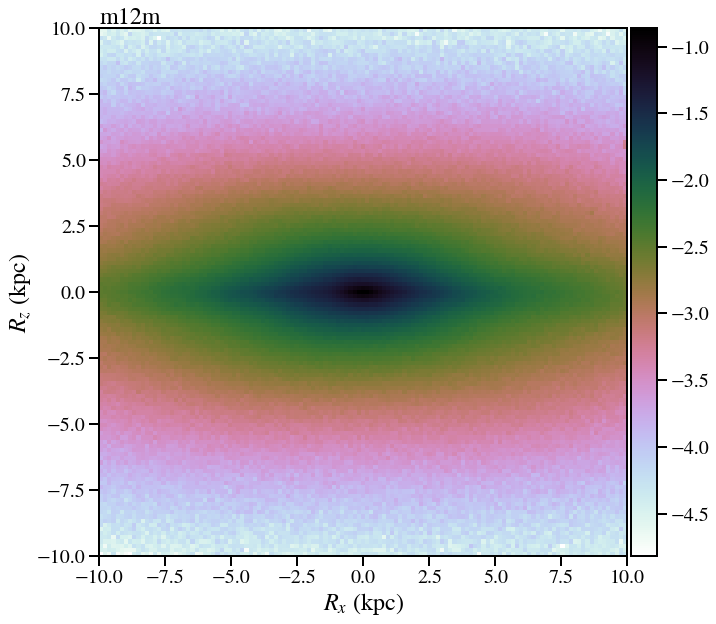

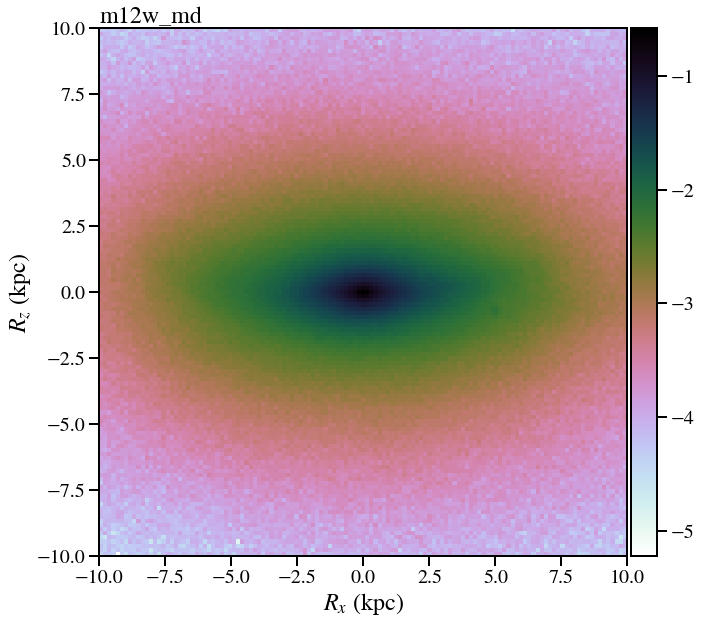

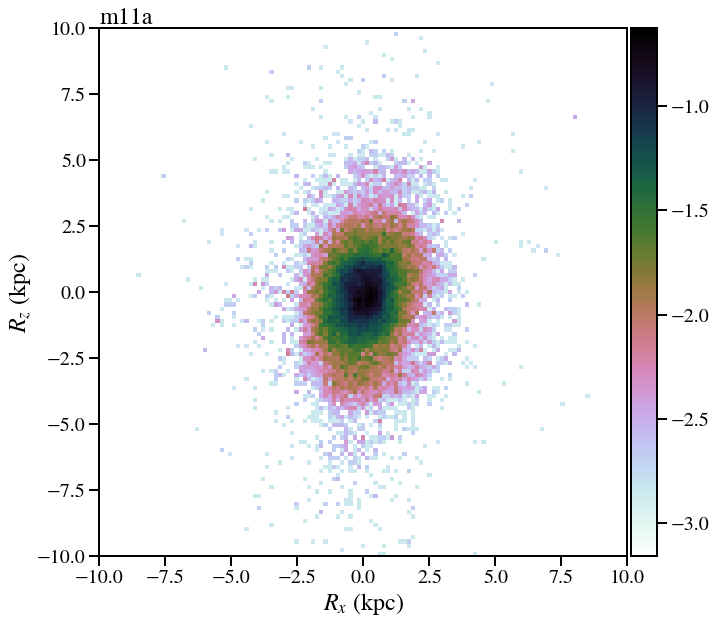

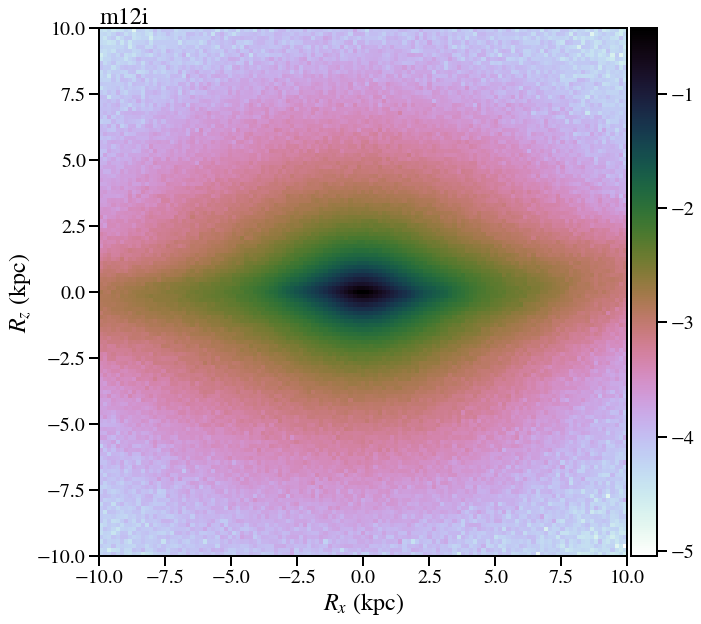

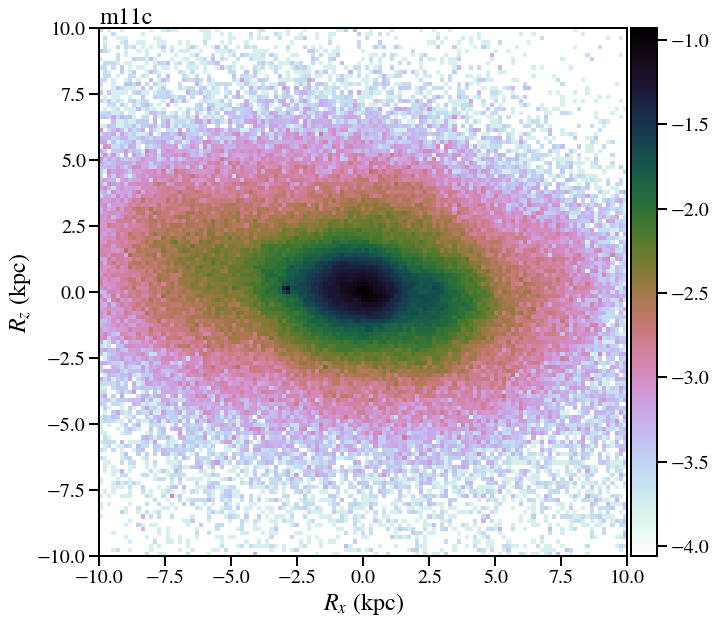

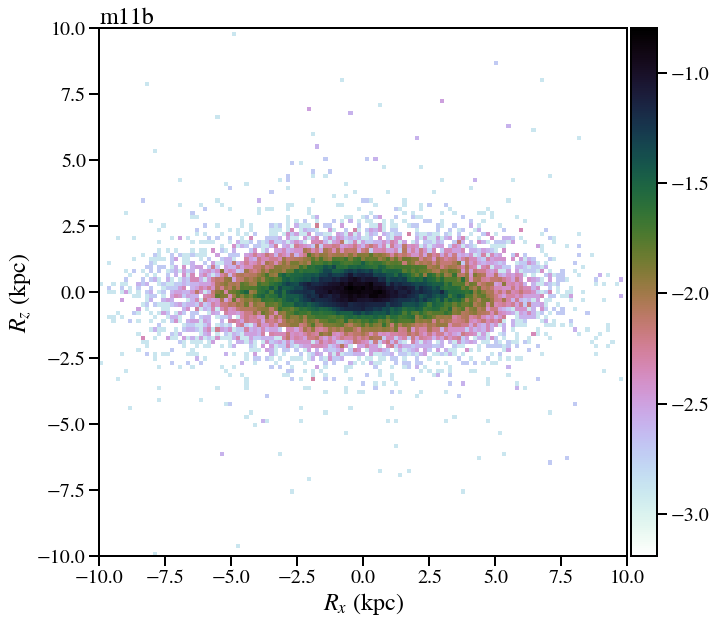

In [17]:
tot_momentums = {}
for sim_name in w_set.keys():
    
    # Load data
    s_data = particle_data.ParticleData(
        sdir = file_manager.get_sim_dir( sim_name ),
        halo_data_dir = file_manager.get_halo_dir( sim_name ),
        snum = snum,
        ptype = 4,
        main_halo_id = linefinder_config.MAIN_MT_HALO_ID[sim_name],
    )

    # Make a Side-On Plot of the Data

    tot_momentum = s_data.total_ang_momentum

    normal_vector = tot_momentum/np.linalg.norm(tot_momentum)

    # Get the data
    r_x = s_data.get_selected_data('Rx')
    r_y = s_data.get_selected_data('Ry')

    # Get the coordinates
    coords = s_data.get_data('P').transpose()

    rotated_coords = data_operations.align_axes(coords, tot_momentum)

    r_x_rot = rotated_coords.transpose()[0]
    r_y_rot = rotated_coords.transpose()[1]
    r_z_rot = rotated_coords.transpose()[2]

    # Make edges
    x_edges = np.linspace(-10., 10., 128)
    y_edges = np.linspace(-10., 10., 128)

    # DEBUG
    # x_edges = np.linspace(-50., 50., 128)
    # y_edges = np.linspace(-50., 50., 128)

    # Make the histogram
    hist2d, x_edges, y_edges = np.histogram2d(r_x_rot, r_z_rot, bins=[x_edges, y_edges], normed=True)
    # hist2d, x_edges, y_edges = np.histogram2d(r_x, r_y, 128, normed=True)

    # Plot the histogram
    fig = plt.figure(figsize=(10,10))
    ax = plt.gca()

    im = ax.imshow(np.log10(hist2d).transpose(), cmap=cm.cubehelix_r, interpolation='nearest',\
                 extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]], \
                 origin='low', aspect='auto')
    
    ax.set_aspect( 'equal' )

    # ax.scatter(p_data.peak_coords[0], p_data.peak_coords[1], marker='x', s=60)

    # Add a colorbar
    cbar = plotting.add_colorbar(ax, im, method='ax')
    cbar.ax.tick_params(labelsize=20)

    # Labels
    ax.set_xlabel(r'$R_x$ (kpc)', fontsize=24)
    ax.set_ylabel(r'$R_z$ (kpc)', fontsize=24)
    ax.annotate(
        s = sim_name,
        xy = ( 0., 1. ),
        ha = 'left',
        va = 'bottom',
        xycoords = 'axes fraction',
        fontsize = 24,
    )

    out_dir = os.path.join( file_manager.project_parameters['extras_dir'], 'edge_on_star_plots' )
    save_file = 'rx_ry_{}_snum{}.png'.format( sim_name, snum )
    plotting.save_fig(
        out_dir,
        save_file,
        fig = fig,
    )

    tot_momentums[sim_name] = tot_momentum

## Plot Angular Profiles

In [18]:
# Functions for comparing to spherical symmetry
def pdf_spherical( phi ):
    
    return np.sin( phi * np.pi / 180. ) * np.pi / 180.

def cdf_spherical( phi ):
    
    return 1. - np.cos( phi * np.pi / 180. )

### Pick a particular simulation and look at the angular profile in depth

In [19]:
sim_name = 'm12w_md'

In [20]:
w_set[sim_name].calc_abs_phi( normal_vector=tot_momentums[sim_name] )

Attribute calc_abs_phi not found in plotting object. Checking data object.


/home1/03057/zhafen/repos/galaxy-dive/galaxy_dive/analyze_data/simulation_data.py:1306: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if normal_vector == 'total ang momentum':
/home1/03057/zhafen/repos/galaxy-dive/galaxy_dive/analyze_data/simulation_data.py:1360: RuntimeWarning: invalid value encountered in less
  phi < 90.,


#### Overall conditional distribution

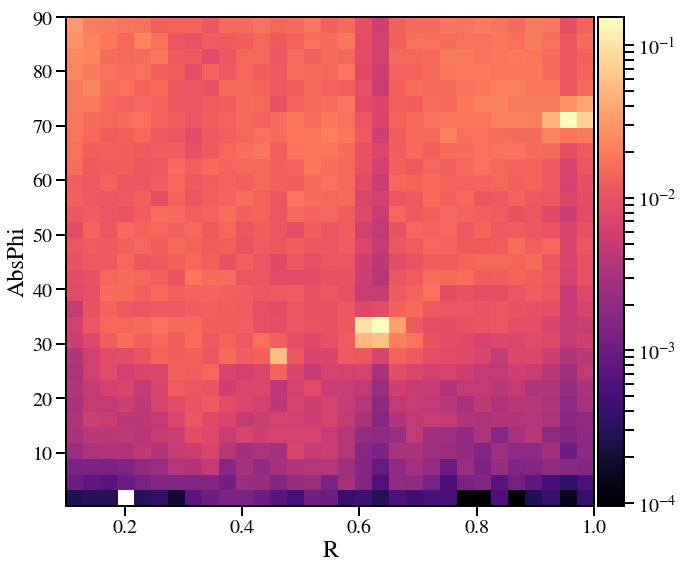

In [21]:
hist2d, x_edges, y_edges = w_set[sim_name].histogram2d(
    'R',
    'AbsPhi',
    n_bins = 32,
    x_data_args = {
        'scale_key' : 'Rvir',
        'scale_a_power' : 1.,
        'scale_h_power' : -1.,
    },
    slices = ind,
    return_dist = True,
    normed = True,
    conditional_y = True,
#     classification = 'is_CGM_IP',
)

#### How the mass compares to the spherical mass

In [22]:
# Construct a pdf array for each r
y_mids = ( y_edges + 0.5*( y_edges[1] - y_edges[0] ) )[:-1]
pdf_per_x = pdf_spherical( y_mids )

/home1/03057/zhafen/repos/linefinder/linefinder/analyze_data/worldlines.py:1343: RuntimeWarning: invalid value encountered in less_equal
  is_in_CGM_rvir = ( r_rvir <= config.OUTER_CGM_BOUNDARY ) \
/home1/03057/zhafen/repos/linefinder/linefinder/analyze_data/worldlines.py:1344: RuntimeWarning: invalid value encountered in greater_equal
  & ( r_rvir >= config.INNER_CGM_BOUNDARY )
/home1/03057/zhafen/repos/linefinder/linefinder/analyze_data/worldlines.py:1353: RuntimeWarning: invalid value encountered in greater
  self.galids.parameters['galaxy_cut']


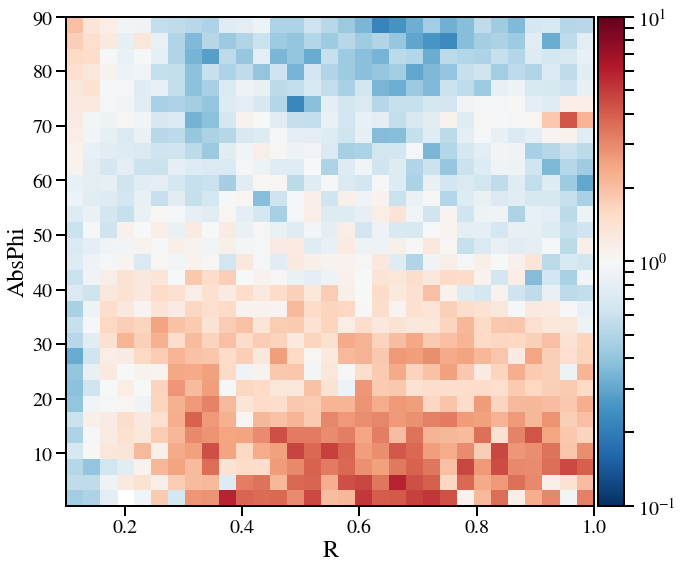

In [23]:

normed_hist2d, x_edge, y_edges = w_set[sim_name].histogram2d(
    'R',
    'AbsPhi',
    n_bins = 32,
    hist_div_arr = pdf_per_x,
    x_data_args = {
        'scale_key' : 'Rvir',
        'scale_a_power' : 1.,
        'scale_h_power' : -1.,
    },
    slices = ind,
    return_dist = True,
    classification = 'is_CGM_IP',
#     z_scale = 'linear',
    normed = True,
    conditional_y = True,
    cmap = cm.RdBu_r,
    vmin = 0.1,
    vmax = 10.,
)

## Plot Mass Compared to Spherical Mass
But for more sims

In [24]:
# Set up radial bins
# radial_bins = np.array([ 0.1, 0.4, 0.7, 1.0 ])
radial_bins = np.linspace( 0.1, 1., 32. )
r_mids = radial_bins[:-1] + 0.5 * ( radial_bins[1] - radial_bins[0] )

/opt/apps/intel17/python/2.7.13/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
# And angular bins
angular_bins = np.array([ 0., 45., 90. ])

In [26]:
# Choose the sims to plot
# sim_names = w_set.split_by_dict( linefinder_config.MASS_BINS )['m12'].keys()
sim_names = w_set.keys()

In [27]:
# Estimate the fraction of mass that should be in each bin
spherical_masses = {}
for i, phi_in in enumerate( angular_bins[:-1] ):
    spherical_mass = cdf_spherical( angular_bins[i+1] ) - cdf_spherical( phi_in )
    spherical_masses[phi_in] = spherical_mass

In [28]:
def get_fraction_data( w_set, additional_masks=None ):
    
    # Set up the data structure
    fraction_data = {}
    for i, classification in enumerate( classification_list ):
        fraction_data[classification] = utilities.SmartDict( {} )

        for j, phi_in in enumerate( angular_bins[:-1] ):
            fraction_data[classification][phi_in] = utilities.SmartDict( {} )

            for k, sim_name in enumerate( sim_names ):
                fraction_data[classification][phi_in][sim_name] = np.zeros( r_mids.shape )

    for sim_name in w_set.keys():

        print( 'Calculating for {}'.format( sim_name ) )

        w = w_set[sim_name].data_object

        ## Set up Masks
        # Start from a fresh slate
        w.data_masker.clear_masks( True )
        # Choose only gas
        w.data_masker.mask_data( 'PType', data_value=linefinder_config.PTYPE_GAS )
        # Mask the angular data
        for i, phi_in in enumerate( angular_bins[:-1] ):

            if 'AbsPhi' not in w.data:
                w.calc_abs_phi( normal_vector=tot_momentums[sim_name] )

            # Mask the data not in this angular bin
            w.data_masker.mask_data(
                'AbsPhi',
                phi_in,
                angular_bins[i+1],
                optional_mask = True,
                mask_name = 'phi{}'.format( int( phi_in ) )
            )
        if additional_masks is not None:
            for mask in additional_masks:
                w.data_masker.mask_data( **mask )

        for classification in classification_list:

            # Get the radial distance values for all data
            r_all = w.get_selected_data(
                'R',
                classification = classification,
                scale_key = 'Rvir',
                scale_a_power = 1.,
                scale_h_power = -1.,
            )
            # Get the mass
            m_all = w.get_selected_data(
                'M',
                classification = classification,
            )
            # See how the mass is divided up.
            r_hist_all, edges = np.histogram(
                r_all,
                bins = radial_bins,
                weights = m_all,
                density = False,
            )

            # Get angular data
            for i, phi_in in enumerate( angular_bins[:-1] ):

                # Get the mass
                m = w.get_selected_data(
                    'M',
                    optional_masks = [ 'phi{}'.format( int( phi_in ) ), ],
                    classification = classification,
                )

                # Get the radial distance values
                r = w.get_selected_data(
                    'R',
                    optional_masks = [ 'phi{}'.format( int( phi_in ) ), ],
                    classification = classification,
                    scale_key = 'Rvir',
                    scale_a_power = 1.,
                    scale_h_power = -1.,
                )

                # See how the mass is divided up.
                r_hist, edges = np.histogram(
                    r,
                    bins = radial_bins,
                    weights = m,
                    density = False,
                )

                fraction_data[classification][phi_in][sim_name] = r_hist / r_hist_all

    return fraction_data

In [29]:
def plot_azimuthal_dep( ax, fraction_data, sim_name, add_labels=False, include_legend=False ):
    
    for classification in classification_list:
        
        class_data = fraction_data[classification]
        
#         y_data = ( class_data[0.][sim_name] / class_data[45.][sim_name] ) / ( spherical_masses[0.] / spherical_masses[45.] )
        y_data = class_data[45.][sim_name]
        
        ax.plot(
            r_mids,
            y_data,
            linewidth = 3,
            color = p_constants.CLASSIFICATION_COLORS_B[classification],
            label = p_constants.CLASSIFICATION_LABELS[classification],
        )
        
    trans = transforms.blended_transform_factory( ax.transAxes, ax.transData )
    ax.plot(
        [ 0., 1., ],
        [ spherical_masses[45.], spherical_masses[45.], ],
        linewidth = 3,
        color = 'k',
        linestyle = '--',
        transform = trans,
        zorder = -10.
    )

    ax.annotate(
        s = sim_name,
        xy = ( 0.95, 0.05, ),
        ha = 'right',
        va = 'bottom',
        xycoords = 'axes fraction',
        fontsize = 24,
    )
        
    ax.set_xlim( 0.1, 1. )
    ax.set_ylim( 0., 1. )
#     ax.set_ylim( 0.1, 2. )
    
    if add_labels:
        ax.set_xlabel( r'$R/R_{\rm vir}$', fontsize=24 )
#         ax.set_ylabel( r'$f_\Phi/f_{\rm \Phi,sphere}$ $(f_\Phi\equiv M_{<45\degree}/ M_{>45\degree})$', fontsize=24)
        ax.set_ylabel( r'$M_{\Phi>45\degree}/M$', fontsize=24)
    
    if include_legend:
        ax.legend(
            prop = { 'size': 18.5 }
        )

In [ ]:
def combined_plot( 
    fraction_data, 
    save_file = None, 
    fraction_data_right = None,
    joint_sim_names = [ 'm12f', 'm12i', 'm12r_md', 'm12w_md',  ],
    left_label = None,
    right_label = None,
):

    n_rows = 4
    n_cols = 2

    fig = plt.figure( figsize=( 6*n_cols, 4*n_rows), facecolor='white' )
    ax = plt.gca()

    gs = gridspec.GridSpec( n_rows, n_cols )
    gs.update( wspace=0.02, hspace=0.05 )

    if fraction_data_right is not None:
        positions = {}
        i_values = {}
        for k, joint_sim_name in enumerate( joint_sim_names ):
            positions[joint_sim_name] = k
            i_values[joint_sim_name] = 0
            
        used_sim_names = copy.copy( joint_sim_names )
        used_sim_names.extend( used_sim_names )
    else:
        positions = {
            'm12f' : (0,0),
            'm12i' : (1,0),
            'm12m' : (0,1),
            'm12b_md' : (1,1),
            'm12c_md' : (0,2),
            'm12r_md' : (1,2),
            'm12w_md' : (0,3),
            'm12z_md' : (1,3),
        }
        used_sim_names = sim_names

    shared_ax = plt.subplot(gs[0,0])

    for sim_name in used_sim_names:

        # We only plot a subset of the simulations, specifically the m12 sims
        if sim_name not in positions.keys():
            continue

        if fraction_data_right is not None:
            j = positions[sim_name]
            i = copy.copy( i_values[sim_name] )
            i_values[sim_name] += 1
        else:
            i, j = positions[sim_name]
        
        ax = plt.subplot(gs[j,i], sharex=shared_ax, sharey=shared_ax )

        if ax.is_first_col() and ax.is_first_row():
            include_legend = True
        else:
            include_legend = False
            
        # Use different data for right column
        if ( fraction_data_right is not None) and ax.is_last_col():
            used_fraction_data = fraction_data_right
        else:
            used_fraction_data = fraction_data
            
        if fraction_data_right is not None:
            used_sim_name = joint_sim_names[j]
        else:
            used_sim_name = sim_name

        plot_azimuthal_dep( ax, used_fraction_data, used_sim_name, False, include_legend )

        # What is/isn't labeled
        if ax.is_last_col():
            ax.tick_params( labelleft = False, labelright=True )
        if not ax.is_last_row():
            ax.tick_params( labelbottom = False )
        if ax.is_first_row():
            ax.tick_params( labeltop = True )

        # Adjust tick labels
        if ax.is_last_row() or ax.is_first_row():
            x_tick_labels = ax.get_xticklabels()
            x_tick_labels[-1].set_horizontalalignment( 'right' )
        y_tick_labels = ax.get_yticklabels()
        y_tick_labels[0].set_verticalalignment( 'bottom' )
        y_tick_labels[-1].set_verticalalignment( 'top' )

        # Adjust ticks
        ax.tick_params(
            direction='in',
            which='both',
            top=True,
            right=True,
            length=7,
        )

        # Add x- and y-labels
        if ax.is_first_row() and ax.is_first_col():
            ax.annotate(
                s = r'$R/R_{\rm vir}$',
                xy = ( 1., 1.2 ),
                ha = 'center',
                va = 'center',
                xycoords = 'axes fraction',
                fontsize = 28,
            )
        if ax.is_last_row() and ax.is_first_col():
            ax.annotate(
                s = r'$R/R_{\rm vir}$',
                xy = ( 1., -0.2 ),
                ha = 'center',
                va = 'center',
                xycoords = 'axes fraction',
                fontsize = 28,
            )
        y_label = r'$M(\Phi > 45\degree)/M$'
        if ax.is_last_col() and j == 1:
            ax.annotate(
                s = y_label,
                xy = ( 1.15, 0. ),
                ha = 'center',
                va = 'center',
                rotation = 'vertical',
                xycoords = 'axes fraction',
                fontsize = 28,
            )        
        if ax.is_first_col() and j == 1:
            ax.annotate(
                s = y_label,
                xy = ( -0.15, 0. ),
                ha = 'center',
                va = 'center',
                rotation = 'vertical',
                xycoords = 'axes fraction',
                fontsize = 28,
            )

        # Add annotations
        if ax.is_last_col() and j == 1:

            # Disk Line
            ax.annotate(
                s = 'disk-like',
                xy = ( 0.2, 1.0 ),
                xytext = ( 0., -12.0 ),
                textcoords = 'offset points',
                fontsize = 24,
                ha = 'left',
                va = 'top',
            )

            # Sphere line
            ax.annotate(
                s = 'spherical',
                xy = ( 0.2, spherical_masses[45.] ),
                xytext = ( 0., -10.0 ),
                textcoords = 'offset points',
                fontsize = 24,
                ha = 'left',
                va = 'top',
            )

            # Jet Line
            ax.annotate(
                s = 'jet-like',
                xy = ( 0.2, 0.0 ),
                xytext = ( 0., 12.0 ),
                textcoords = 'offset points',
                fontsize = 24,
                ha = 'left',
                va = 'bottom',
            )
        if ax.is_first_row():
            if fraction_data_right is not None:
                if ax.is_first_col() and ( left_label is not None):
                    ax.annotate(
                        s = left_label,
                        xy = ( 0.5, 1.125 ),
                        xycoords = 'axes fraction',
                        fontsize = 24,
                        va = 'bottom',
                        ha = 'center',
                    )
                elif ax.is_last_col() and ( right_label is not None):
                    ax.annotate(
                        s = right_label,
                        xy = ( 0.5, 1.125 ),
                        xycoords = 'axes fraction',
                        fontsize = 24,
                        va = 'bottom',
                        ha = 'center',
                    )
            
    if save_file is not None:
        plotting.save_fig(
            out_dir = file_manager.get_project_figure_dir(),
            save_file = save_file,
            fig = fig,
        )

### For All Gas

In [ ]:
# Get the data out
fraction_data = get_fraction_data( w_set )

Calculating for m12b_md


/home1/03057/zhafen/repos/galaxy-dive/galaxy_dive/analyze_data/simulation_data.py:1331: RuntimeWarning: invalid value encountered in arccos
  phi_all[:,i] = np.arccos( cos_phi ) * 180. / np.pi
/home1/03057/zhafen/.local/lib/python2.7/site-packages/numpy/ma/core.py:2184: RuntimeWarning: invalid value encountered in less
  condition = (xf < v1) | (xf > v2)
/home1/03057/zhafen/.local/lib/python2.7/site-packages/numpy/ma/core.py:2184: RuntimeWarning: invalid value encountered in greater
  condition = (xf < v1) | (xf > v2)


Calculating for m10q
Calculating for m10v


/opt/apps/intel17/python/2.7.13/lib/python2.7/site-packages/ipykernel_launcher.py:94: RuntimeWarning: invalid value encountered in divide


Calculating for m11e_md
Calculating for m10z


In [ ]:
for sim_name in sim_names:
    
    fig = plt.figure( figsize=(10,8), facecolor='white' )
    ax = plt.gca()

    plot_azimuthal_dep( ax, fraction_data, sim_name, True, True )

In [ ]:
save_file = 'CGM_m12_azimuthal_fractions_snum{}.pdf'.format( snum )
combined_plot( fraction_data, save_file=save_file )

### For Cold Gas

In [ ]:
# Get the data out
cold_fraction_data = get_fraction_data( 
    w_set, 
    additional_masks = [ {
        'data_key': 'T',
        'data_min': 0.,
        'data_max': 10.**4.7,
    }, ]
)

In [ ]:
save_file = 'CGM_m12_azimuthal_fractions_cold_snum{}.pdf'.format( snum )
combined_plot( cold_fraction_data, )

### For Warm-Hot Gas

In [ ]:
# Get the data out
wh_fraction_data = get_fraction_data( 
    w_set.split_by_dict( linefinder_config.MASS_BINS )['m12'], 
    additional_masks = [ {
        'data_key': 'T',
        'data_min': 10.**4.7,
        'data_max': np.inf,
    }, ]
)

In [ ]:
save_file = 'CGM_m12_azimuthal_fractions_warmhot_snum{}.pdf'.format( snum )
combined_plot( wh_fraction_data, )

### Compare the Two

In [ ]:
save_file = 'CGM_m12_azimuthal_fractions_comparison_snum{}.pdf'.format( snum )
combined_plot( 
    cold_fraction_data, 
    fraction_data_right = wh_fraction_data,
    left_label = r'$T < 10^{4.7}$ K',
    right_label = r'$T > 10^{4.7}$ K',
    save_file = save_file,
)

### Outwards Moving Gas

In [ ]:
outflow_fraction_data = get_fraction_data( 
    w_set.split_by_dict( linefinder_config.MASS_BINS )['m12'], 
    additional_masks = [ {
        'data_key': 'Vr',
        'data_min': 1.,
        'data_max': np.inf,
        'scale_key': 'Vmax',
    }, ]
)

In [ ]:
combined_plot( outflow_fraction_data )

## Full Angular Profiles

In [ ]:
# Start from a fresh slate
w_set.data_object.data_masker.clear_masks( True )
# Choose only gas
w_set.data_object.data_masker.mask_data( 'PType', data_value=linefinder_config.PTYPE_GAS )

In [ ]:
hists = {}

bins = np.linspace( 0., 90., 256 )
for version in [ 1, 2, ]:
    
    fig = plt.figure( figsize=(10,16), facecolor='white' )
    main_ax = plt.gca()

    gs = matplotlib.gridspec.GridSpec( len( classification_list ), 1, )

    gs.update(wspace=0.025, hspace=0.0001)

    y_max = 0
    for i, classification in enumerate( classification_list ):

        hists[classification] = utilities.SmartDict( {} )

        ax = plt.subplot( gs[i,0] )

        for sim_name, w_plotter in w_set.items():

            # Plot only some simulations
            if version == 1:
                if sim_name not in [ 'm10y', 'm11v', 'm12i', ]:
                    continue
#             elif version == 2:
#                 # Skip the outlier
#                 if sim_name == 'm10z':
#                     continue

            # Get the data
            w = w_plotter.data_object
            w.calc_abs_phi( normal_vector=tot_momentums[sim_name] )

            # Only plot when there's enough data
            n_class = w.get_selected_data( classification, sl=(slice(None),ind), ).sum()
            if n_class < 1000:
                print( 'Insufficient {} for sim {}'.format( classification, sim_name ) )
                continue

            # Color
            m_vir = halo_masses[sim_name]
            z_width = np.log10( z_max ) - np.log10( z_min )
            color_value = ( np.log10( m_vir ) - np.log10( z_min ) )/z_width
            color = cm.viridis( color_value )

            hist, edges = w_plotter.histogram(
                'AbsPhi',
                bins = bins,
                weight_key = 'M',
                ax = ax,
                mask_zeros = True,
                norm_type = 'probability',
                smooth = True,
                smoothing_window_length = 31,
                histogram_style = 'line',
                x_label = r'$\Phi$ $(\degree)$',
                y_label = p_constants.CLASSIFICATION_LABELS[classification],
            #     bins = used_bins,
                slices = ind,
                plot_label = None,
                color = color,
                assert_contains_all_data = False,
                classification = classification,
                return_dist = True,
            )
            
            # Try and plot a spherical distribution
            phi_a = np.linspace( 0., 90., 1024 )
            y_spherical = pdf_spherical( phi_a )
            ax.plot(
                phi_a,
                y_spherical,
                color = 'k',
                linestyle = '--',
                linewidth = 3,
            )

            # Track the maxes so we can set plot limits
            if hist.max() > y_max:
                y_max = hist.max()
                
            # Store the data
            if version == 2:
                hists[classification][sim_name] = hist

        # Adjust tick parameters
        ax.tick_params( direction='inout', which='both', top=True, )

        if classification != 'is_in_CGM':
            ax.yaxis.label.set_path_effects(
                [
                    path_effects.Stroke(
                        linewidth=2,
                        foreground=p_constants.CLASSIFICATION_COLORS_B[classification]
        #                 foreground='k',
                    ),
                    path_effects.Normal() 
                ]
            )

        # Add another x-axis label
        if i == 0:
            ax.annotate(
                s = r'$\Phi$ $(\degree)$',
                xy = ( 0.5, 1.17, ),
                xycoords = 'axes fraction',
                fontsize = 22,
                ha = 'center',
            )

        # Add a label to the y axes
        if i == 0:

            formatted_redshift = '{:.02g}'.format( w.redshift.values[ind] )

            ax.annotate(
#                 s = r'$\frac{d(M/M_{\rm tot})}{d(r/r_{\rm vir})}' + r'(z={})$'.format( formatted_redshift ),
                s = r'PDF $' + r'(z={})$'.format( formatted_redshift ),
                xy = ( 0, 1.2, ),
                xycoords = 'axes fraction',
                fontsize = 28,
                ha = 'center',
            )
            
        # Hide labels
        if i != len( classification_list ) - 1:
            ax.tick_params( labelbottom = False )
        if i == 0:
            ax.tick_params( labeltop = True )

        # Avoid overlapping ticks
        ax.get_yticklabels()[0].set_verticalalignment( 'bottom' )
        ax.get_yticklabels()[-1].set_verticalalignment( 'top' )
    #     ax.set_yticklabels([0., 0.5, 1. ], va='top' )
    
    # Set limits
    for i, classification in enumerate( classification_list ):
        ax = plt.subplot( gs[i,0] )
        ax.set_xlim( 0., 90. )
        ax.set_ylim( 0., 1.05*y_max )

    # Add a colorbar
    sm = cm.ScalarMappable(
        cmap = cm.viridis,
        norm=colors.LogNorm( z_min, z_max ),
    )
    sm._A = []
    plotting.add_colorbar(
        fig,
        sm,
        method='fig',
        ax_location=[0.905, 0.125, 0.03, 0.76]
    )
    plt.subplot( gs[0,0] ).annotate(
        s = r'$M_{\rm h}$ $(M_{\odot})$',
        xy = (1., 1.2),
    #     xy = (1.15, 0.5),
        xycoords = 'axes fraction',
        fontsize = 22,
        ha = 'center',
    )

#     if version == 1:
#         save_file = 'CGM_profile_snum{}.pdf'.format( snum )

#         plotting.save_fig(
#             out_dir = file_manager.get_project_figure_dir(),
#             save_file = save_file,
#             fig = fig,
#         )

## Plot Aggregate

In [ ]:
medians = {}

fig = plt.figure( figsize=(10,16), facecolor='white' )
main_ax = plt.gca()

gs = matplotlib.gridspec.GridSpec( len( classification_list ), 1, )

gs.update(wspace=0.025, hspace=0.0001)

for i, classification in enumerate( classification_list ):
    
    medians[classification] = utilities.SmartDict( {} )
    
    y_max = 0
    
    sub_hists = hists[classification].split_by_dict( linefinder_config.MASS_BINS )
    
#     plotted_colors = [ '#36a936', '#3636a9', '#a93636' ]
    plotted_colors = [ '#2820c6', '#0aa929', '#dfb707' ]
#     plotted_colors = [ qual_colormaps.DARK2[j] for j in range(3) ]
    for mass_bin, color in zip( [ 'm10', 'm11', 'm12' ], plotted_colors ):
        
        if ( classification == 'is_CGM_EP' ) and ( mass_bin == 'm10' ):
            continue
        
        sub_hist = sub_hists[mass_bin]
        
        valid_regime = np.invert( np.isnan( sub_hist.array() ) ).sum( axis=0 ) >= 2
        
        sub_arr = sub_hist.array()

        ax = plt.subplot( gs[i,0] )
        
        median = np.nanmedian( sub_arr, axis=0 )
        ax.plot(
            bins[:-1],
            median,
            color = color,
            linewidth = 3,
            label = r'$M_{\rm h}(z=0) \sim 10^{' + mass_bin[1:] + r'} M_\odot$',
        )
        medians[classification][mass_bin] = median

        ax.fill_between(
            bins[:-1],
            np.nanmin( sub_arr, axis=0 ),
            np.nanmax( sub_arr, axis=0 ),
            color = color,
            alpha = 0.4,
        )
        
#         ax.fill_between(
#             used_bins,
#             np.nanpercentile( sub_arr, 25, axis=0 ),
#             np.nanpercentile( sub_arr, 75, axis=0 ),
#             color = color,
#             alpha = 0.4,
#         )
                
        # Track the maxes so we can set plot limits
        hist_max = np.nanmax( sub_hist.array() )
        
    if hist_max > y_max:
        y_max = hist_max

        # Try and plot a spherical distribution
        phi_a = np.linspace( 0., 90., 1024 )
        y_spherical = pdf_spherical( phi_a )
        ax.plot(
            phi_a,
            y_spherical,
            color = 'k',
            linestyle = '--',
            linewidth = 3,
        )
        
    ax.set_xlabel(
        r'$\Phi$ $(\degree)$',
        fontsize = 22,
    )
    ax.set_ylabel(
        p_constants.CLASSIFICATION_LABELS[classification],
        fontsize = 22,
    )
     
    ax.set_xlim( 0., 90. )
    ax.set_ylim( 0., y_max, )
    ax.set_yscale( 'linear' )

    # Adjust tick parameters
    ax.tick_params( direction='inout', which='both', top=True, )

    # Rotate labels
#     ax.yaxis.label.set_rotation( 'horizontal' )
#     ax.yaxis.label.set_color(
#         p_constants.CLASSIFICATION_COLORS_B[classification]
#     )

    if classification != 'is_in_CGM':
        ax.yaxis.label.set_path_effects(
            [
                path_effects.Stroke(
                    linewidth=2,
                    foreground=p_constants.CLASSIFICATION_COLORS_B[classification]
    #                 foreground='k',
                ),
                path_effects.Normal() 
            ]
        )

    # Add another x-axis label
    if i == 0:
        ax.annotate(
            s = r'$\Phi$ $(\degree)$',
            xy = ( 0.5, 1.17, ),
            xycoords = 'axes fraction',
            fontsize = 22,
            ha = 'center',
        )
        
    if i == 1:
        ax.legend(
            prop={'size': 18},
#             loc = 'upper right',
        )

    # Add a label to the y axes
    if i == 0:

        formatted_redshift = '{:.02g}'.format( w.redshift.values[ind] )

        ax.annotate(
            s = r'$f(\Phi$ | origin, $ ' + r'z={})$'.format( formatted_redshift ),
            xy = ( 0, 1.2, ),
            xycoords = 'axes fraction',
            fontsize = 24,
            ha = 'center',
        )

    # Hide labels
    if i != len( classification_list ) - 1:
        ax.tick_params( labelbottom = False )
    if i == 0:
        ax.tick_params( labeltop = True )

    # Avoid overlapping ticks
    ax.get_yticklabels()[0].set_verticalalignment( 'bottom' )
    ax.get_yticklabels()[-1].set_verticalalignment( 'top' )
#     ax.set_yticklabels([0., 0.5, 1. ], va='top' )

# save_file = 'CGM_aggregate_profile_snum{}.pdf'.format( snum )
# plotting.save_fig(
#     out_dir = file_manager.get_project_figure_dir(),
#     save_file = save_file,
#     fig = fig,
# )

In [ ]:
medians = {}

fig = plt.figure( figsize=(10,16), facecolor='white' )
main_ax = plt.gca()

gs = matplotlib.gridspec.GridSpec( len( classification_list ), 1, )

gs.update(wspace=0.025, hspace=0.0001)

for i, classification in enumerate( classification_list ):
    
    medians[classification] = utilities.SmartDict( {} )
    
    y_max = 0
    
    class_hists = hists[classification].split_by_dict( linefinder_config.MASS_BINS )['m12']
                
    sub_arr = class_hists.array()

    ax = plt.subplot( gs[i,0] )

    median = np.nanmedian( sub_arr, axis=0 )
    ax.plot(
        bins[:-1],
        median,
        color = 'k',
        linewidth = 3,
    )

    ax.fill_between(
        bins[:-1],
        np.nanmin( sub_arr, axis=0 ),
        np.nanmax( sub_arr, axis=0 ),
        color = 'k',
        alpha = 0.2,
    )

    ax.fill_between(
        bins[:-1],
        np.nanpercentile( sub_arr, 16, axis=0 ),
        np.nanpercentile( sub_arr, 84, axis=0 ),
#         np.nanpercentile( sub_arr, 50 - 68/2, axis=0 ),
#         np.nanpercentile( sub_arr, 50 + 68/2, axis=0 ),        
        color = 'k',
        alpha = 0.2,
    )
    
    # Try and plot a spherical distribution
    phi_a = np.linspace( 0., 90., 1024 )
    y_spherical = pdf_spherical( phi_a )
    ax.plot(
        phi_a,
        y_spherical,
        color = 'k',
        linestyle = '--',
        linewidth = 3,
    )

    # Track the maxes so we can set plot limits
    hist_max = np.nanmax( class_hists.array() )

    if hist_max > y_max:
        y_max = hist_max
      
    ax.set_xlabel(
        r'Azimuthal Angle, $\Phi$ $(\degree)$',
        fontsize = 22,
    )
    ax.set_ylabel(
        p_constants.CLASSIFICATION_LABELS[classification],
        fontsize = 22,
    )
     
    ax.set_xlim( 0., 90. )
    ax.set_ylim( 0., 0.03, )
    ax.set_yscale( 'linear' )

    # Adjust tick parameters
    ax.tick_params( direction='inout', which='both', top=True, )

    # Rotate labels
#     ax.yaxis.label.set_rotation( 'horizontal' )
#     ax.yaxis.label.set_color(
#         p_constants.CLASSIFICATION_COLORS_B[classification]
#     )

    if classification != 'is_in_CGM':
        ax.yaxis.label.set_path_effects(
            [
                path_effects.Stroke(
                    linewidth=2,
                    foreground=p_constants.CLASSIFICATION_COLORS_B[classification]
    #                 foreground='k',
                ),
                path_effects.Normal() 
            ]
        )

    # Add another x-axis label
    if i == 0:

        ax.annotate(
            s = r'$\Phi$ $(\degree)$',
            xy = ( 0.5, 1.17, ),
            xycoords = 'axes fraction',
            fontsize = 22,
            ha = 'center',
        )
        
    if i == 2:
        ax.legend(
            prop={'size': 18},
            loc = 'upper right',
        )

    # Add a label to the y axes
    if i == 0:

        formatted_redshift = '{:.02g}'.format( w.redshift.values[ind] )

        ax.annotate(
            s = r'$f(\Phi$ | origin, $ ' + r'z={})$'.format( formatted_redshift ),
            xy = ( 0, 1.2, ),
            xycoords = 'axes fraction',
            fontsize = 24,
            ha = 'center',
        )

    # Hide labels
    if i != len( classification_list ) - 1:
        ax.tick_params( labelbottom = False )
    if i == 0:
        ax.tick_params( labeltop = True )

    # Avoid overlapping ticks
    ax.get_yticklabels()[0].set_verticalalignment( 'bottom' )
    ax.get_yticklabels()[-1].set_verticalalignment( 'top' )
#     ax.set_yticklabels([0., 0.5, 1. ], va='top' )

save_file = 'CGM_aggregate_ang_dist_m12s_snum{}.pdf'.format( snum )
plotting.save_fig(
    out_dir = file_manager.get_project_figure_dir(),
    save_file = save_file,
    fig = fig,
)

# Analysis of the Plot

In [ ]:
import py2tex.py2tex as py2tex

In [ ]:
tex_filepath = os.path.join( file_manager.project_parameters['project_dir'], 'variables.tex' )

In [ ]:
tex_file = py2tex.TeXVariableFile( tex_filepath )

In [ ]:
# Used for variable names
if snum == 465:
    regime = 'low'
if snum == 172:
    regime = 'high'

In [ ]:
def get_radii_percentile( pdf, q ):

    cdf = np.nancumsum( pdf )*( base_bins[1] - base_bins[0] )

    k = np.argmax( cdf > q )

    return base_bins[k]

In [ ]:
def get_mass_within( pdf, r ):

    cdf = np.nancumsum( pdf )*( base_bins[1] - base_bins[0] )

    k = np.argmax( base_bins > r )

    return cdf[k]

# Analysis of Radial Dependence of Azimuthal Angle Plots

### m12f

In [ ]:
tex_file.save_variable(
    'mtwelvefIGMAccretionmedmassfrac{}'.format( regime ),
    '{:.2g}'.format( np.median( fraction_data['is_CGM_NEP'][45.]['m12f'] ) )
)

In [ ]:
tex_file.save_variable(
    'mtwelvefsatwindmedmassfrac{}'.format( regime ),
    '{:.2g}'.format( np.median( fraction_data['is_CGM_EP'][45.]['m12f'] ) )
)